In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [3]:
!unzip x.zip

Archive:  x.zip
   creating: x/
   creating: x/test/
   creating: x/test/deepika/
  inflating: x/test/deepika/1ffa0d0385876195dc84875ceee9be02.jpg  
  inflating: x/test/deepika/3-2.jpg  
  inflating: x/test/deepika/5.jpg    
  inflating: x/test/deepika/7cd6631b29d68e13832197589fec49cf.jpg  
  inflating: x/test/deepika/8e75a7aead8524de79235bf398831ef8.jpg  
   creating: x/test/ranveer/
  inflating: x/test/ranveer/05-ranveer-singh-hd-picture.jpg  
  inflating: x/test/ranveer/06-ranveer-singh-hd-picture.jpg  
  inflating: x/test/ranveer/08-ranveer-singh-hd-picture.jpg  
  inflating: x/test/ranveer/08-ranveer-singh-hd-picture_001.jpg  
  inflating: x/test/ranveer/09-ranveer-singh-hd-picture.jpg  
   creating: x/train/
   creating: x/train/deepika/
  inflating: x/train/deepika/deepika_0.jpg  
  inflating: x/train/deepika/deepika_1.jpg  
  inflating: x/train/deepika/deepika_2.jpg  
  inflating: x/train/deepika/deepika_3.jpg  
  inflating: x/train/deepika/deepika_4.jpg  
   creating: x/train/

In [0]:
#base_dir = "x"
#seta = "deepika"
##setb = "ranveer"
#train_dir = os.path.join(base_dir, 'train') 
#test_dir = os.path.join(base_dir, 'test') 

In [7]:
import cv2
train_data_dir = "x/train"
categories = ["deepika", "ranveer"]
images = []
labels = []
IMG_SIZE = 150

training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(train_data_dir,category)
        class_num = categories.index(category)
        labels.append(class_num)
        for img in os.listdir(path): 
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
            #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            images.append(img_array)  
            training_data.append([img_array, class_num])
create_training_data()
print("training_data = ",len(training_data))
print("images",len(images))
print("labels",len(labels))

training_data =  10
images 10
labels 2


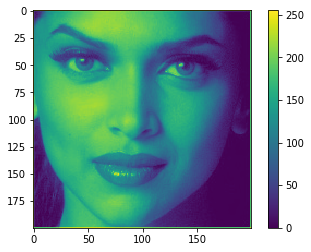

In [8]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

train_images = images
train_labels = labels

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

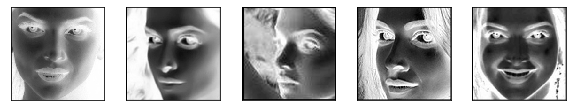

In [9]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_num[train_labels[i]])
plt.show()

In [10]:
import cv2
test_data_dir = "x/test"
categories = ["deepika", "ranveer"]
images1 = []
labels1 = []
IMG_SIZE = 150

testing_data = []

def create_testing_data():
    for category in categories:
        path = os.path.join(test_data_dir,category)
        class_num = categories.index(category)
        labels1.append(class_num)
        for img in os.listdir(path): 
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
            #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            images1.append(img_array)  
            testing_data.append([img_array, class_num])
create_testing_data()
print("testing_data = ",len(testing_data))
print("images1",len(images1))
print("labels1",len(labels1))

testing_data =  10
images1 10
labels1 2


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape = (150, 150, 3))
x = layers.Conv2D(64, 3, activation = 'relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(512, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(512, 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(4096, activation = 'relu')(x)
x = layers.Dense(1000, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation = 'sigmoid')(x)
model = Model(img_input, output)

In [46]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 256)       0   

In [0]:
import tensorflow as tf
model.compile(loss = "binary_crossentropy", 
              optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005),
              metrics = ['acc'])

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_images = ImageDataGenerator(rescale = 1./255)
train_generator = train_images.flow_from_directory(
    train_data_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 10 images belonging to 2 classes.


In [49]:
mymodel = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    verbose = 2
)

Epoch 1/10
10/10 - 3s - loss: 0.6972 - acc: 0.5200
Epoch 2/10
10/10 - 1s - loss: 0.6690 - acc: 0.6200
Epoch 3/10
10/10 - 1s - loss: 0.4403 - acc: 0.8100
Epoch 4/10
10/10 - 1s - loss: 0.0184 - acc: 1.0000
Epoch 5/10
10/10 - 1s - loss: 2.3564 - acc: 0.9300
Epoch 6/10
10/10 - 1s - loss: 0.0595 - acc: 0.9600
Epoch 7/10
10/10 - 1s - loss: 0.0024 - acc: 1.0000
Epoch 8/10
10/10 - 1s - loss: 4.7751e-05 - acc: 1.0000
Epoch 9/10
10/10 - 1s - loss: 1.2842e-07 - acc: 1.0000
Epoch 10/10
10/10 - 1s - loss: 1.3585e-08 - acc: 1.0000


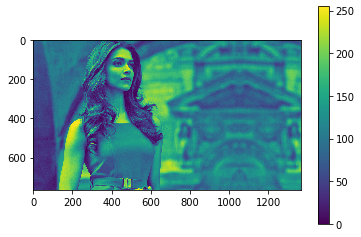

In [50]:
test_images = images1
test_labels = labels1

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_images = ImageDataGenerator(rescale = 1./255)
validation_generator = test_images.flow_from_directory(
    test_data_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 10 images belonging to 2 classes.


In [52]:
mymodel = model.fit_generator(
    validation_generator,
    steps_per_epoch = 10,
    epochs = 10,
    verbose = 2
)

Epoch 1/10
10/10 - 8s - loss: 2.4833 - acc: 0.7400
Epoch 2/10
10/10 - 8s - loss: 0.2587 - acc: 0.8900
Epoch 3/10
10/10 - 8s - loss: 0.7999 - acc: 0.9000
Epoch 4/10
10/10 - 8s - loss: 0.0377 - acc: 0.9900
Epoch 5/10
10/10 - 8s - loss: 0.1103 - acc: 0.9700
Epoch 6/10
10/10 - 8s - loss: 0.0028 - acc: 1.0000
Epoch 7/10
10/10 - 8s - loss: 1.3388e-04 - acc: 1.0000
Epoch 8/10
10/10 - 8s - loss: 1.3596e-06 - acc: 1.0000
Epoch 9/10
10/10 - 7s - loss: 5.4494e-06 - acc: 1.0000
Epoch 10/10
10/10 - 7s - loss: 3.3208e-06 - acc: 1.0000


In [53]:
mymodel = model.fit_generator(
    train_generator, 
    steps_per_epoch = 7,
    epochs = 10,
    validation_data=validation_generator,
    #validation_steps = 7,
    verbose = 2)

Epoch 1/10
Epoch 1/10
7/7 - 2s - loss: 1.9620 - acc: 0.8571 - val_loss: 0.0203 - val_acc: 1.0000
Epoch 2/10
Epoch 1/10
7/7 - 1s - loss: 0.0288 - acc: 1.0000 - val_loss: 0.1483 - val_acc: 0.9000
Epoch 3/10
Epoch 1/10
7/7 - 1s - loss: 0.0093 - acc: 1.0000 - val_loss: 1.5042e-04 - val_acc: 1.0000
Epoch 4/10
Epoch 1/10
7/7 - 1s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0281 - val_acc: 1.0000
Epoch 5/10
Epoch 1/10
7/7 - 1s - loss: 3.0983e-04 - acc: 1.0000 - val_loss: 0.6000 - val_acc: 0.8000
Epoch 6/10
Epoch 1/10
7/7 - 1s - loss: 9.6128e-05 - acc: 1.0000 - val_loss: 0.1740 - val_acc: 0.9000
Epoch 7/10
Epoch 1/10
7/7 - 1s - loss: 5.5872e-06 - acc: 1.0000 - val_loss: 0.0199 - val_acc: 1.0000
Epoch 8/10
Epoch 1/10
7/7 - 1s - loss: 3.6248e-06 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 9/10
Epoch 1/10
7/7 - 1s - loss: 1.8399e-06 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 10/10
Epoch 1/10
7/7 - 1s - loss: 9.3705e-07 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000


Text(0.5, 1.0, 'train & val loss')

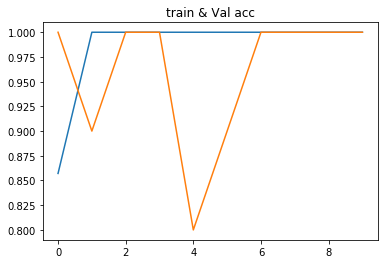

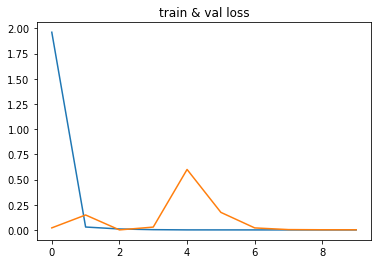

In [54]:
acc = mymodel.history['acc']
val_acc = mymodel.history['val_acc']
loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('train & Val acc')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('train & val loss')

In [0]:
model.predict(train_generator)

array([[1.000000e+00],
       [9.999999e-01],
       [0.000000e+00],
       [0.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       [0.000000e+00],
       [8.940697e-08],
       [1.000000e+00],
       [0.000000e+00]], dtype=float32)

In [0]:
print('identify as : \n')
if(model.predict(train_generator) < 0.5).any():
  print("deepika")
elif(model.predict(train_generator) > 0.5).any():
  print("ranveer")
else:
  print("dont know")

identify as : 

deepika
